# Stoneburner, Kurt
- ## DSC 550 - Week 06

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Install YellowBrick: conda install -c conda-forge yellowbrick


Part 1:  Complete this tutorial (Steps 1-10) and then use what you learn to create your own case study.
The data set is available in Weekly Resources/Data

Case Study:  Analyze data to predict who will Survive the Titanic
 
1. Load the data from the “train.csv” file into a DataFrame.

2. Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.


3.	Display the first 5 rows of data so you can see the column headings and the type of data for each column.
    - Notice that Survived is represented as a 1 or 0
    - Notice that missing data is represented as “NaN”
    - The Survived variable will be the “target” and the other variables will be the “features”
4.	Think about some questions that might help you predict who will survive:
    - What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
    - Are the numerical variables correlated?
    - Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?
    - Are there different survival rates in different categories? For example, did more women survived than man?
5.	Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?  
6.	Make some histograms of your data (“A picture is worth a thousand words!”)
    -	Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. A large amount of the tickets sold were less than \\$50. There are very few tickets sold where the fare was over \\$500.
1.	Make some bar charts for variables with only a few options.
    - Ticket and Cabin have more than 100 variables so don’t do those!
1.	To see if the data is correlated, make some Pearson Ranking charts
    - Notice that in my sample code, I have saved this png file.
    - The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.
1.	 Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.
    - That’s a cool chart, isn’t it?!  Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate.  
10.	Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.
    - More females survived than men.  3rd Class Tickets had a lower survival rate.  Also, Embarkation from Southampton port had a lower survival rate.




In [4]:
#Titanic Tutorial Part 1
#Graphics Analysis


import pandas as pd
import yellowbrick


#Step 1:  Load data into a dataframe
addr1 = "z_wk06_train.csv"
data = pd.read_csv(addr1)

# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

#Step 3:  Look at the data
print(data.head(5))

#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

The dimension of the table is:  (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0     

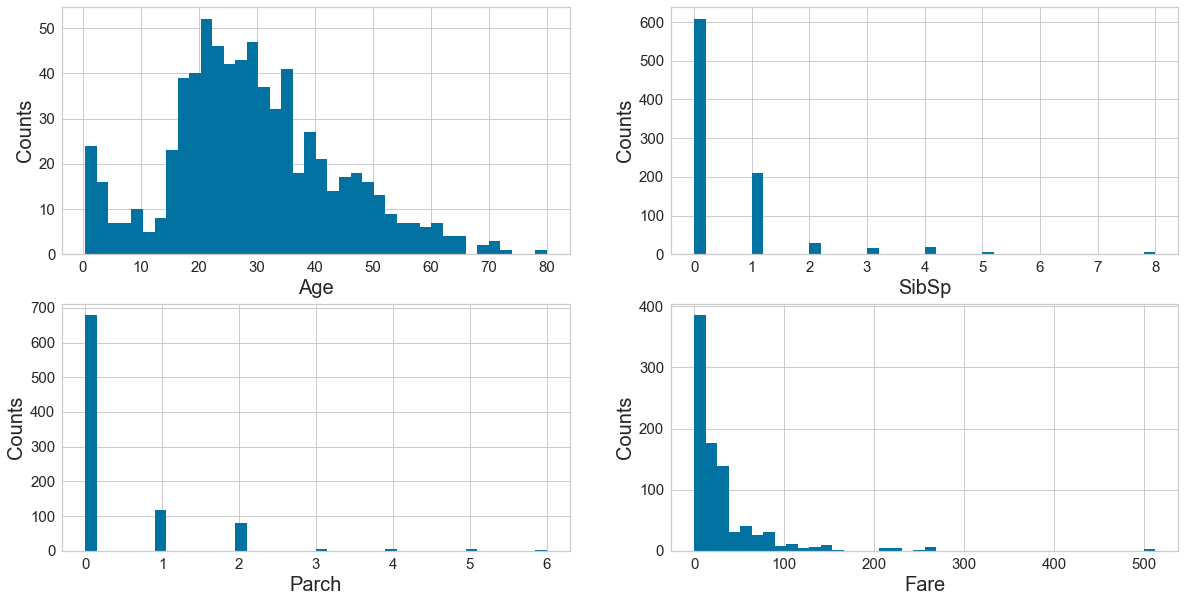

In [6]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()


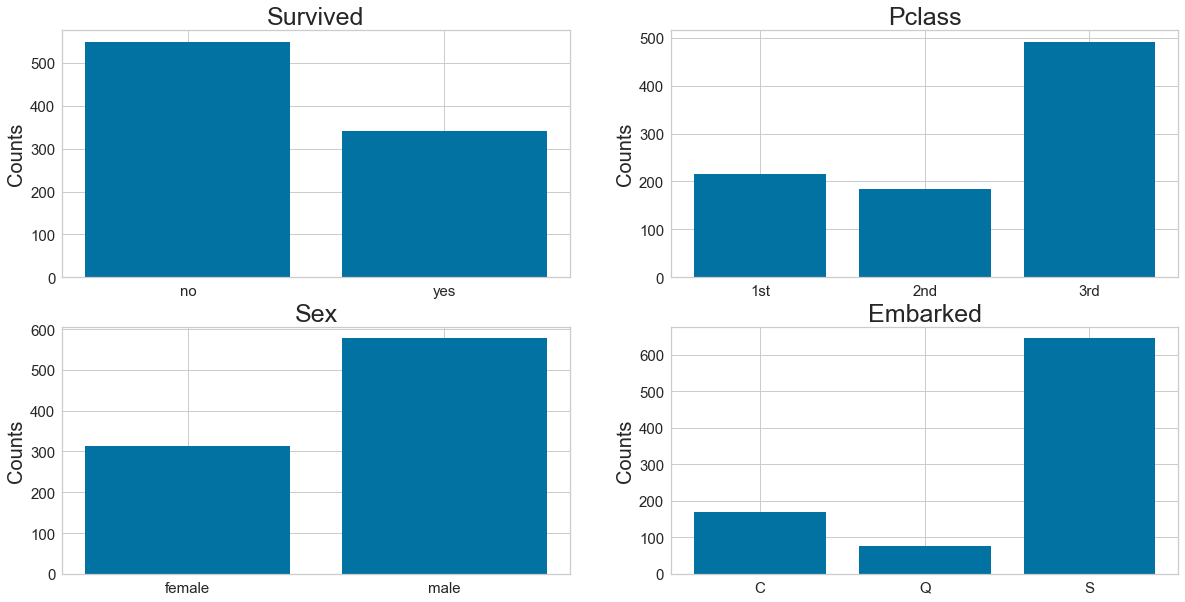

In [7]:
#7:  Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

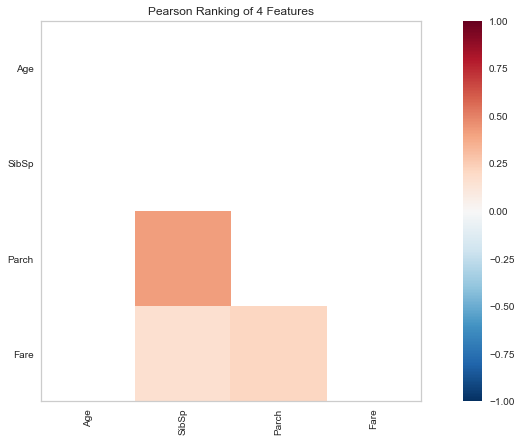

In [14]:
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
#X = data[num_features].as_matrix()

# extract the numpy arrays from the data frame
X = data[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="z_wk06_pcoords1.png") # Draw/show/poof the data
plt.show()

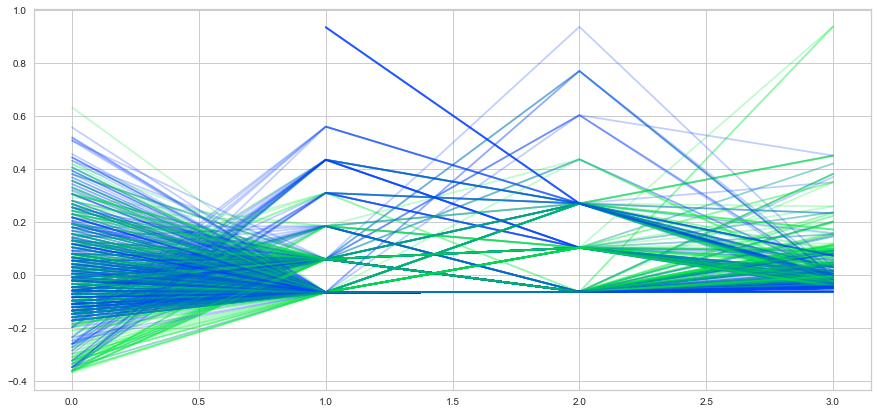

In [17]:
# Step 9:  Compare variables against Survived and Not Survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.Survived.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();

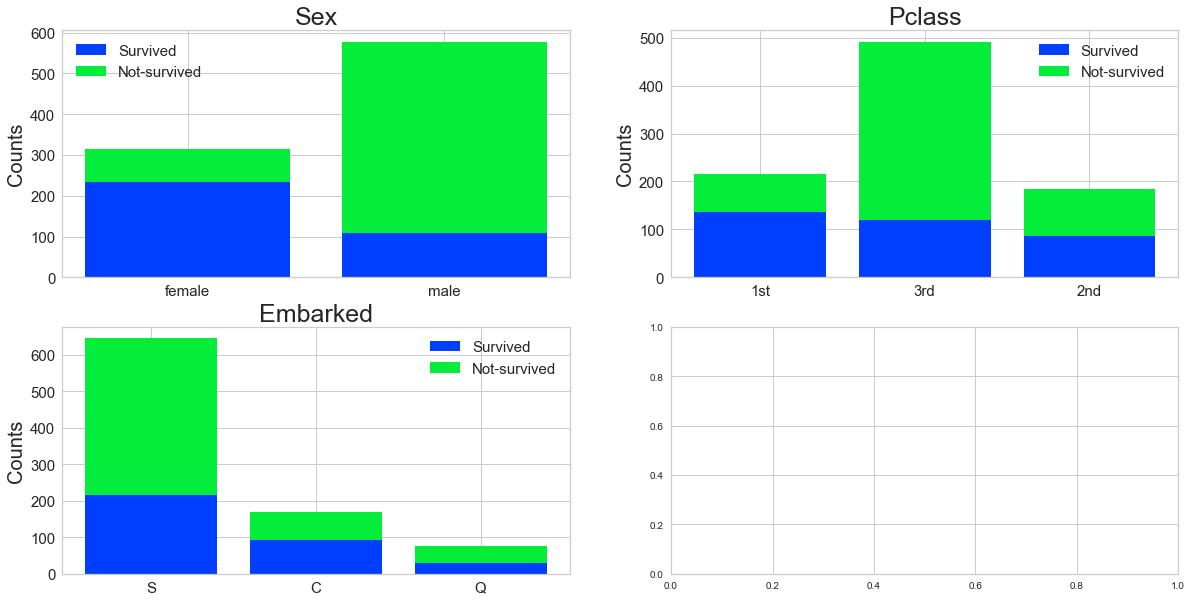

In [18]:






# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show()


In [20]:
# //*** CODE HERE

import pandas as pd
import numpy as np
import json
import sys
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

#11.1 Cross-Validating Models

digits = datasets.load_digits()
features=digits.data
target=digits.target
standardizer=StandardScaler()
logit=LogisticRegression()
pipeline=make_pipeline(standardizer, logit)
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_results=cross_val_score(pipeline, # Pipeline
                           features, # Feature matrix
                           target,#target vector
                           cv=kf, # Cross-validation technique
                           scoring = "accuracy", # Loss function
                           n_jobs = -1)
print(cv_results.mean())
print (cv_results)
print("results")


0.9666076970825573
[0.96666667 0.97222222 0.98333333 0.95555556 0.96666667 0.95
 0.97777778 0.96089385 0.96648045 0.96648045]
results


In [21]:
# //*** CODE HERE
#Problem 11.2 – Creating a Baseline Regression Model

from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

#load data
boston=load_boston()

#create features
features, target = boston.data, boston.target

#make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

#create a dummy regressor
dummy=DummyRegressor(strategy='mean')

#"Train" dummy regressor
dummy.fit(features_train, target_train)

#get R-squared score
print(dummy.score(features_test, target_test))

#to compare, train the model and evaluate the performance score

#load library
from sklearn.linear_model import LinearRegression

#train simple linear regression model
ols=LinearRegression()
ols.fit(features_train, target_train)

#get r-squared score
print(ols.score(features_test, target_test))


-0.001119359203955339
0.6354638433202129


In [22]:
# //*** CODE HERE
#Prob 11_8 Evaluation Regression Models

#Load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#generate features matrix, target vector
features, target=make_regression (n_samples=100,
                                  n_features = 3,
                                  n_informative = 3,
                                  n_targets = 1,
                                  noise = 50,
                                  coef = False,
                                  random_state = 1)

#create a linear regression object
ols = LinearRegression()

#cross-validate the linear regression using (negative) MSE
print("MSE:  ",cross_val_score(ols, features, target, scoring = 'neg_mean_squared_error'))

#cross-validate the linear regression using R-squared
print("R2:", cross_val_score(ols, features, target, scoring = 'r2'))



MSE:   [-1974.65337976 -2004.54137625 -3935.19355723 -1060.04361386
 -1598.74104702]
R2: [0.8622399  0.85838075 0.74723548 0.91354743 0.84469331]


In [ ]:
# //*** CODE HERE